In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_all_combine_theta/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Welcome to JupyROOT 6.10/08


In [2]:
pot_data =    7.644e+18  # best with tor875

outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
#RootFile = ROOT.TFile(output_filedir+"xsec_theta_wighted.root","RECREATE");


In [3]:
#!jupyter nbconvert --to script numuCCana_xsec_genie_all_combine_theta.ipynb

In [4]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# All Genie cross section variation 100 multisims, mitigation cos(Theta)

In [5]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [6]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [7]:
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
num_universes = 100

In [8]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
f_mom_tmp = ROOT.TFile.Open(path+"xsec_all_genie_theta/All_Genie_theta.root", 'read')
#f_mom = ROOT.TFile.Open(path+"xsec_all_genie_theta/All_Genie_theta_save.root", 'read')
# fix file: root -l
#            TFile *MyFile = new TFile("All_Genie_theta.root","UPDATE");
#           MyFile->Write()


In [9]:
h_data = f_mom_tmp.Get('h_data_mom')
h_ext = f_mom_tmp.Get('h_ext_mom')
h_dirt = f_mom_tmp.Get('h_dirt_mom')

print h_data.Integral(0,binnum+1)
print h_ext.Integral(0,binnum+1)
print h_dirt.Integral(0,binnum+1)

1289.0
133.661839008
31.8223114014


In [10]:
f_mom = ROOT.TFile.Open(path+"xsec_all_genie_theta/All_Genie_theta.root", 'read')

In [11]:
#pot_data = 8.649e+18
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/30.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [12]:
h_bkg = []
h_sig = []
h_true = []
h_mitigation = []
i = 0
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
for uni in range(num_universes):
    h_bkg.append(f_mom.Get('h_1d_bkg['+str(uni)+']'))
    h_sig.append(f_mom.Get('h_1d['+str(uni)+']'))
    h_true.append(f_mom.Get('h_1d_true['+str(uni)+']'))
    h_mitigation.append(f_mom.Get('h_migration['+str(uni)+'])'))

191934.00293 392356.09375


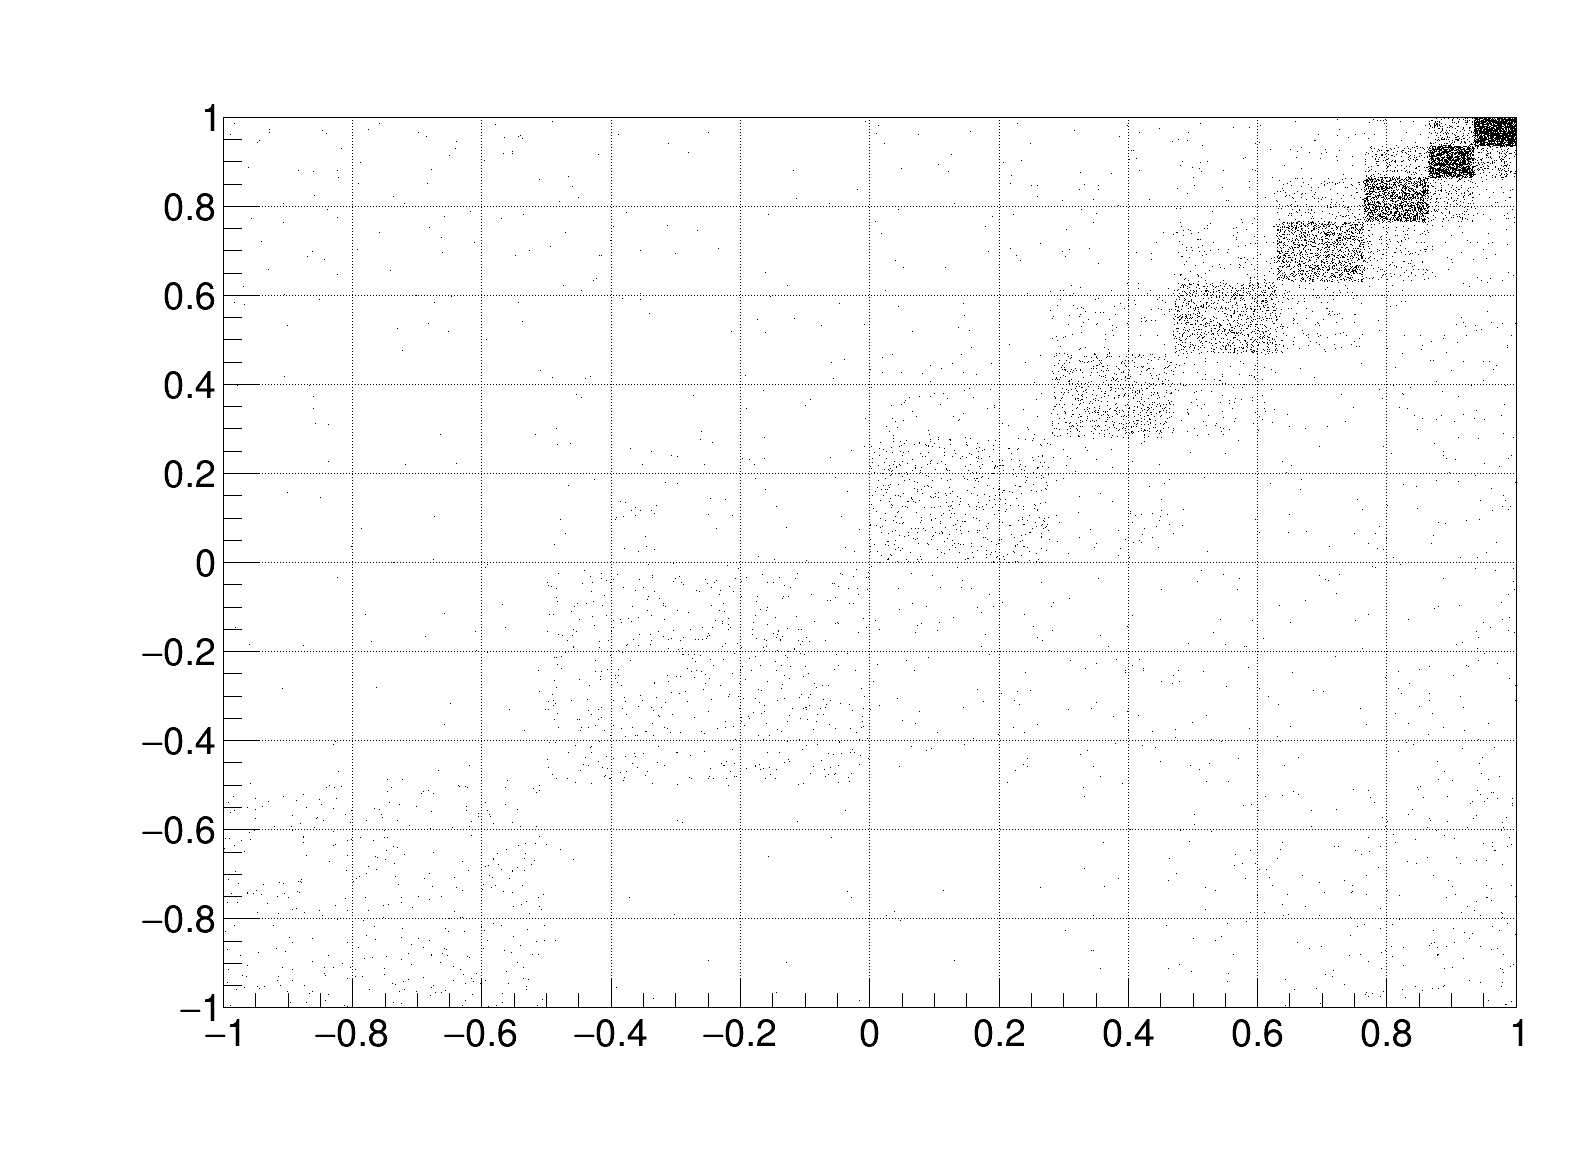

In [13]:
print h_sig[99].Integral(0,binnum+1),h_true[99].Integral(0,binnum+1)
#h_mitigation_matrix[50].Draw('colz text')
#c1.Draw()
h_eff_tilde = {}
for uni in range(num_universes):
    h_eff_tilde[uni] = ROOT.TH1F("h_eff_tilde["+str(uni)+']','Efficiency tilde',binnum,array('f',mom_bins))
h_mitigation[99].Draw()
c1.Draw()

In [14]:
f_mom.Get('h_migration[99])')
#f_mom.ls()

<ROOT.TH2F object ("h_migration[99]") at 0x71f3ca0>

In [15]:
reco_entries = np.zeros((num_universes,9))
ROOT.gStyle.SetPaintTextFormat("2.3f");
mitigation_matrix = np.zeros((num_universes,9,9))
for uni in range(num_universes):
    for j in range(1,binnum+1):
        for i in range(1,binnum+1):
            #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
            reco_entries[uni][j-1]+=h_mitigation[uni].GetBinContent(i,j)
h_mitigation_matrix = {}
for uni in range(num_universes):        
    h_mitigation_matrix[uni] = ROOT.TH2F('h_mitigation_matrix['+str(uni)+']','Migration matrix',9,0,9,9,0,9)
    for j in range(1,binnum+1):
        for i in range(1,binnum+1):
            #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
            mitigation_matrix[uni][i-1,j-1]= h_mitigation[uni].GetBinContent(i,j)/reco_entries[uni][j-1]
            h_mitigation_matrix[uni].SetBinContent(i,j,mitigation_matrix[uni][i-1,j-1])
            #print i-1,j-1,mitigation_matrix[i-1,j-1]
            #true_entries[j]+=h_migration.GetBinContent(i,j)
    #print mitigation_matrix
    h_mitigation_matrix[uni].SetXTitle("Reco bin i")
    h_mitigation_matrix[uni].SetYTitle("True bin j")
    #h_mitigation_matrix.Draw('colz')
    #h_mitigation_matrix.Draw('same text')

#c1.Draw()
#c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix_theta.png")
#c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix_theta.root")
#h_mitigation_matrix.Write("h_mitigation_matrix_theta")

In [16]:
#mitigation_matrix = np.zeros((num_universes,9,9))
#for uni in range(num_universes):
#    for j in range(1,binnum+1):
#        for i in range(1,binnum+1):
#            mitigation_matrix[uni,i-1,j-1]= h_mitigation_matrix[uni].GetBinContent(i,j)


In [17]:
# calculate e tilde for all universes
N_sel = np.zeros((num_universes,9))
N_gen = np.zeros((num_universes,9))
eff_tilde = np.zeros((num_universes,9))
for uni in range(num_universes):
    for i in range(1,binnum+1):
        N_sel[uni][i-1] = h_sig[uni].GetBinContent(i)
        N_gen[uni][i-1] = h_true[uni].GetBinContent(i)
    eff_tilde[uni] = mitigation_matrix[uni].dot(N_sel[uni])/(mitigation_matrix[uni].dot(N_gen[uni]))
    

In [18]:
#h_eff_tilde[99].Draw()
#c1.Draw()

In [19]:
h_eff_true = {}
h_eff_tilde = {}
for uni in range(num_universes):
    h_eff_tilde[uni] = ROOT.TH1F("h_eff_tilde["+str(uni)+']','Efficiency tilde',binnum,array('f',mom_bins))
    h_eff_true[uni] = h_sig[uni].Clone()
    #h_eff_true[uni].Sumw2()
    h_eff_true[uni].Divide(h_true[uni])
    for i in range(1,binnum+1):
        h_eff_tilde[uni].SetBinContent(i,eff_tilde[uni][i-1])
        h_eff_tilde[uni].SetBinError(i,h_eff_true[uni].GetBinError(i))
    h_eff_tilde[uni].SetYTitle("reconstructed efficiency")
    h_eff_tilde[uni].SetXTitle("cos(\Theta_{\mu})")
    

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//png/h_eff_tilde_all_genie_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//root/h_eff_tilde_all_genie_theta.root has been created


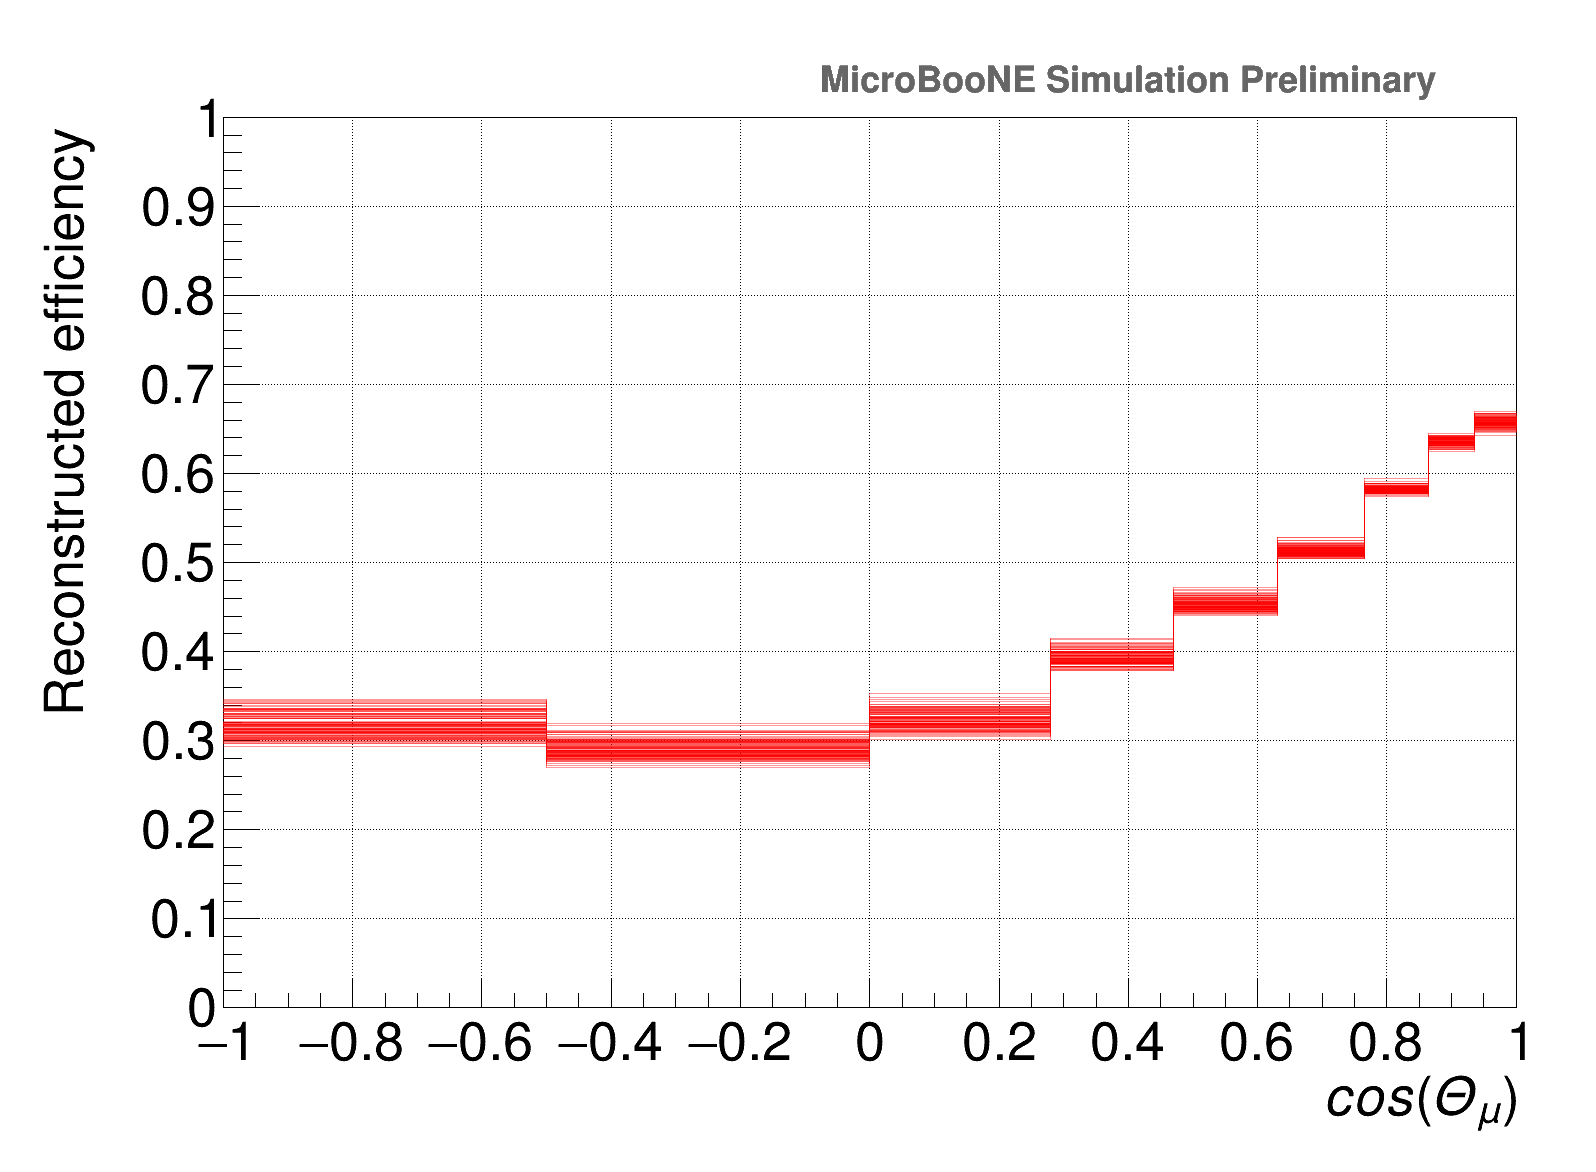

In [20]:

h_eff_tilde[0].Draw('hist')
for uni in range(num_universes): 
    h_eff_tilde[uni].SetMaximum(1)
    h_eff_tilde[uni].SetMinimum(0)
    h_eff_tilde[uni].SetLineColorAlpha(ROOT.kRed,0.4)
    h_eff_tilde[uni].SetYTitle("Reconstructed efficiency")
    h_eff_tilde[uni].SetXTitle("cos(\Theta_{\mu})")
    h_eff_tilde[uni].GetYaxis().SetTitleSize(0.05)
    h_eff_tilde[uni].GetYaxis().SetTitleOffset(0.0)
    h_eff_tilde[uni].GetYaxis().SetLabelSize(0.05)
    h_eff_tilde[uni].GetXaxis().SetTitleSize(0.05)
    h_eff_tilde[uni].GetXaxis().SetLabelSize(0.05)
    h_eff_tilde[uni].GetXaxis().SetTitleOffset(1)
    #h_covariance.SetLineColor(ROOT.kBlack)
    h_eff_tilde[uni].SetLineWidth(1)
    ROOT.gStyle.SetEndErrorSize(5)
    h_eff_tilde[uni].Draw('hist same')
#h_eff_tilde.Draw('hist same')   
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_all_genie_theta.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_all_genie_theta.root")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_all_genie_theta.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//png/h_eff_true_all_genie_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//root/h_eff_true_all_genie_theta.root has been created


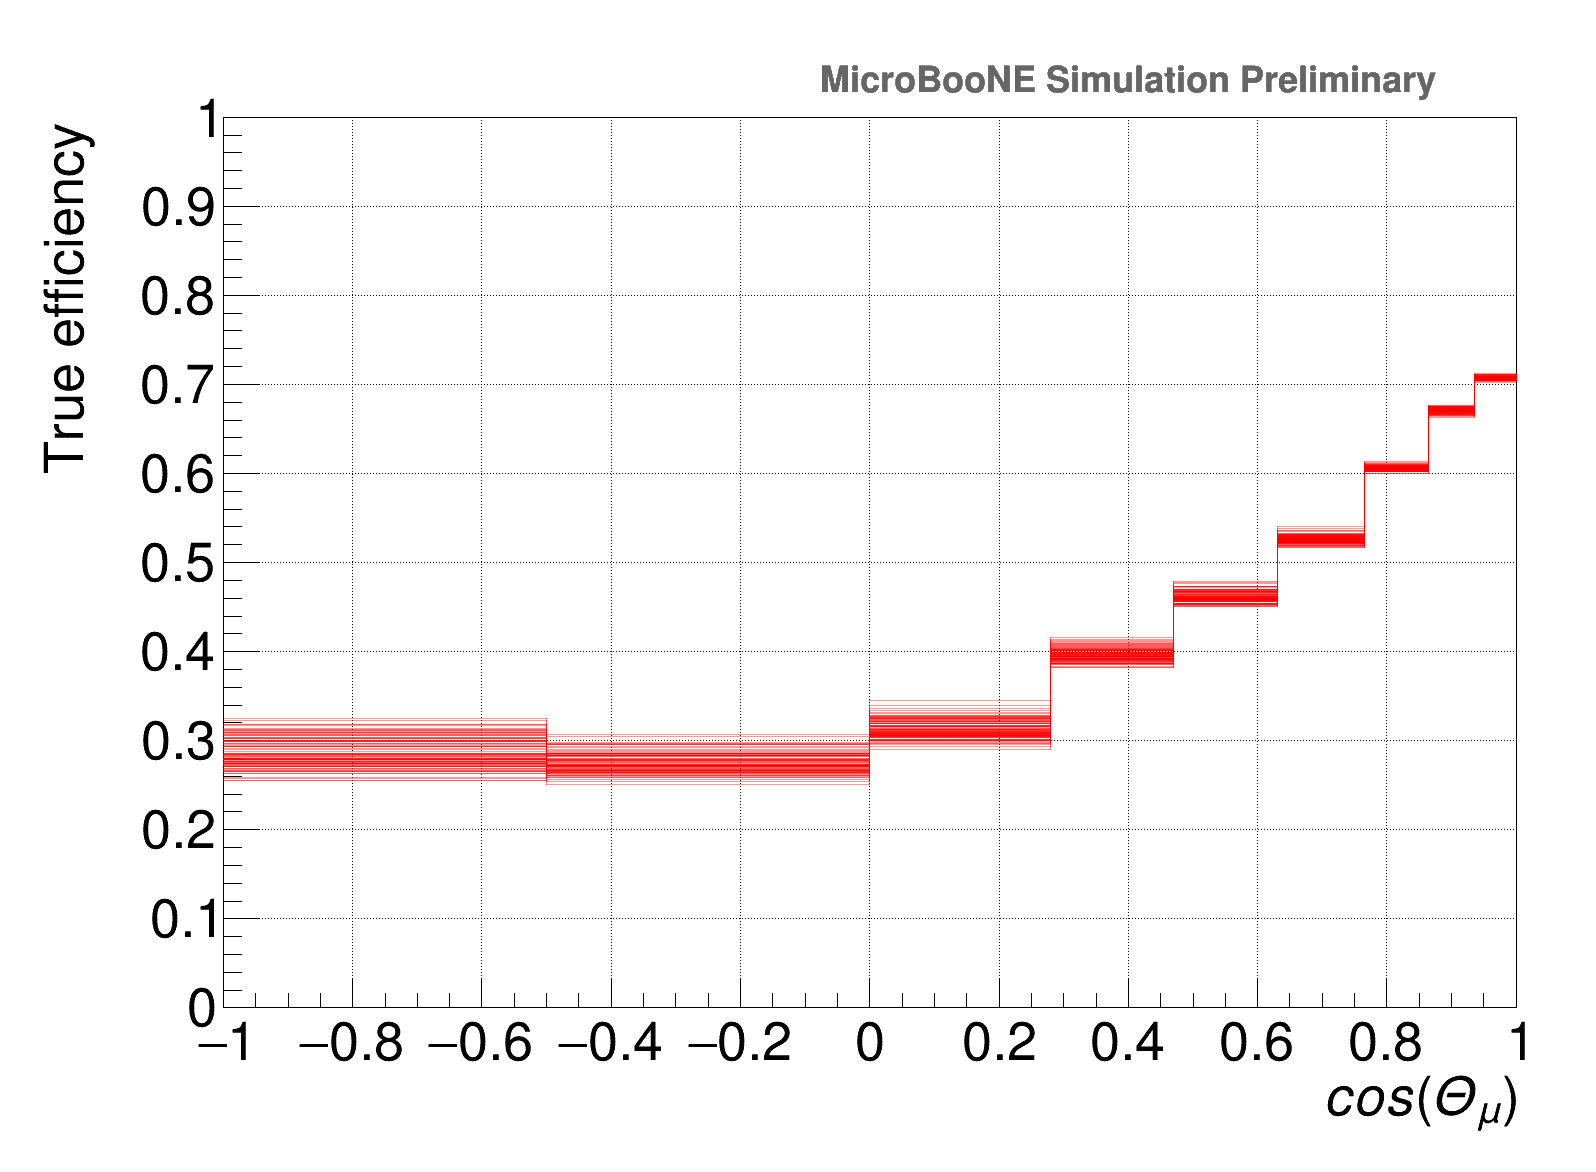

In [21]:
h_eff_true = {}

#h_eff_tilde[0].Draw('hist')
for uni in range(num_universes): 
    h_eff_true[uni] = h_sig[uni].Clone()
    h_eff_true[uni].Divide(h_true[uni])
    h_eff_true[uni].SetMaximum(1)
    h_eff_true[uni].SetMinimum(0)
    h_eff_true[uni].SetLineColorAlpha(ROOT.kRed,0.4)
    h_eff_true[uni].SetYTitle("True efficiency")
    h_eff_true[uni].SetXTitle("cos(\Theta_{\mu})")
    h_eff_true[uni].GetYaxis().SetTitleSize(0.05)
    h_eff_true[uni].GetYaxis().SetTitleOffset(0.0)
    h_eff_true[uni].GetYaxis().SetLabelSize(0.05)
    h_eff_true[uni].GetXaxis().SetTitleSize(0.05)
    h_eff_true[uni].GetXaxis().SetLabelSize(0.05)
    h_eff_true[uni].GetXaxis().SetTitleOffset(1)
    #h_covariance.SetLineColor(ROOT.kBlack)
    h_eff_true[uni].SetLineWidth(1)
    #ROOT.gStyle.SetEndErrorSize(5)
    if(uni==0):
        h_eff_true[uni].Draw('hist')
    else:
        h_eff_true[uni].Draw('hist same')
        
#h_eff_tilde.Draw('hist same')  
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_true_all_genie_theta.png")
c1.SaveAs(outputdir_root + "h_eff_true_all_genie_theta.root")
c1.SaveAs(outputdir_pdf + "h_eff_true_all_genie_theta.pdf")

In [22]:
h_xsec = {}
for uni in range(num_universes): 
    h_xsec[uni] = h_data.Clone()
    #h_xsec[uni].Sumw2()
    h_xsec[uni].Add(h_ext,-1)
    h_xsec[uni].Add(h_dirt,-1)
    h_xsec[uni].Add(h_bkg[uni],-1)
    #print h_xsec[uni].GetSumOfWeights()

In [23]:
for uni in range(num_universes): 
    h_xsec[uni].Divide(h_eff_tilde[uni])
    h_xsec[uni].Scale(1.0/(N_tot * beam_flux))
    for i in range(1,binnum+1):
        h_xsec[uni].SetBinContent(i,h_xsec[uni].GetBinContent(i)/h_xsec[uni].GetBinWidth(i))
        h_xsec[uni].SetBinError(i,h_xsec[uni].GetBinError(i)/h_xsec[uni].GetBinWidth(i))

    #h_xsec[uni].Write('h_xsec['+str(uni)+']')

In [24]:
for i in range(num_universes): 
    h_xsec[i].Scale(1e38)

In [25]:
path_cv = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_filesV4/'
f_cv = ROOT.TFile.Open(path_cv+"xsec_theta_wighted.root", 'read')

h_xsec_cv = f_cv.Get('h_xsec_data_theta')

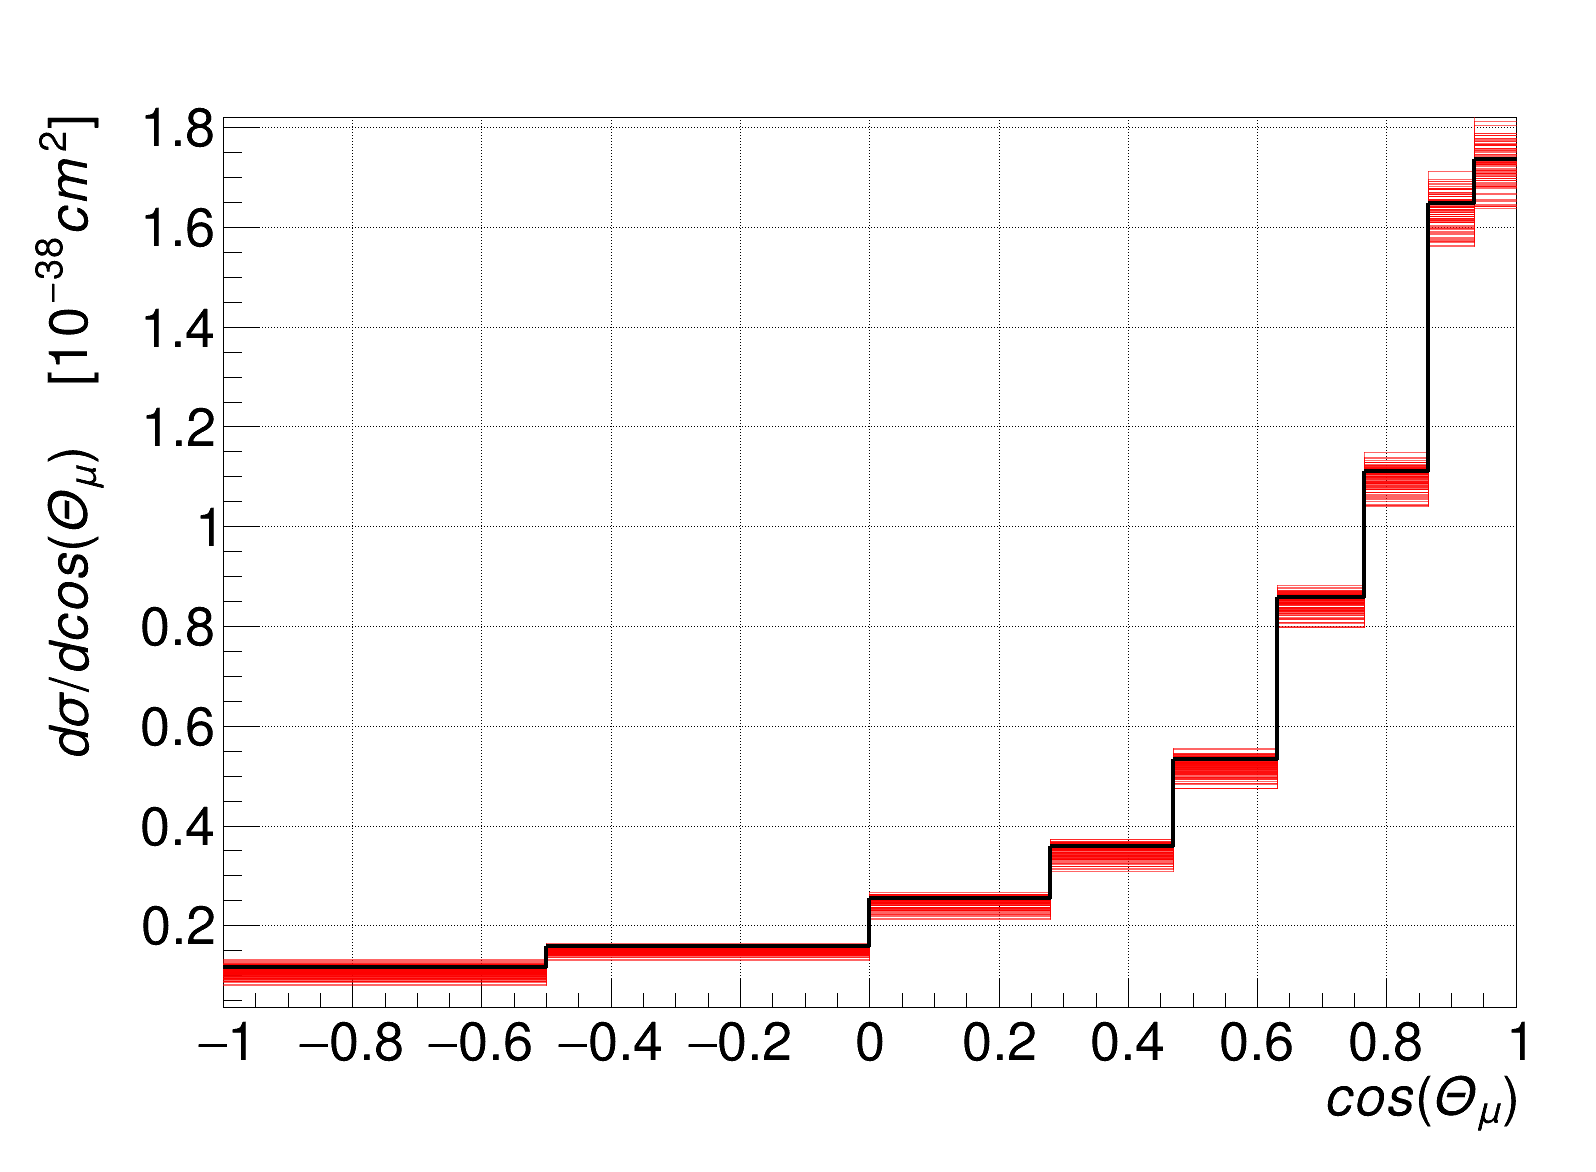

In [26]:
h_xsec_cv.Draw('hist')
for uni in range(num_universes): 
    h_xsec[uni].SetMaximum(2.6)
    h_xsec[uni].SetLineColorAlpha(ROOT.kRed,0.6)
    h_xsec[uni].SetYTitle("d\sigma / d cos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
    h_xsec[uni].SetXTitle("cos(\Theta_{\mu})")
    h_xsec[uni].Draw('hist same')
h_xsec_cv.Draw('hist same')   
c1.Draw()
    

In [27]:
num_bins = h_xsec[0].GetNbinsX()

xsec_cov_matrix = np.zeros((num_bins,num_bins))
xsec_frac_cov_matrix = np.zeros((num_bins,num_bins))
#xsec_diff_matrix = np.zeros((num_bins))
for uni in range(num_universes):
    xsec_diff_matrix = np.zeros((num_bins))
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_xsec_cv.GetBinContent(b+1)-h_xsec[uni].GetBinContent(b+1) )
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
xsec_cov_matrix = xsec_cov_matrix/num_universes
    
xsec_corr_matrix = np.zeros((num_bins,num_bins))
for i in range(num_bins): 
    for j in range(num_bins):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))
        xsec_frac_cov_matrix[i][j] = xsec_cov_matrix[i][j]/(h_xsec_cv.GetBinContent(i+1)*h_xsec_cv.GetBinContent(j+1))
#np.save(output_filedir+'correlation_detsys',xsec_corr_matrix)
#np.save(output_filedir+'covariance_detsys',xsec_cov_matrix)

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//png/h_correlation_detsys_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//root/h_correlation_detsys_theta.root has been created


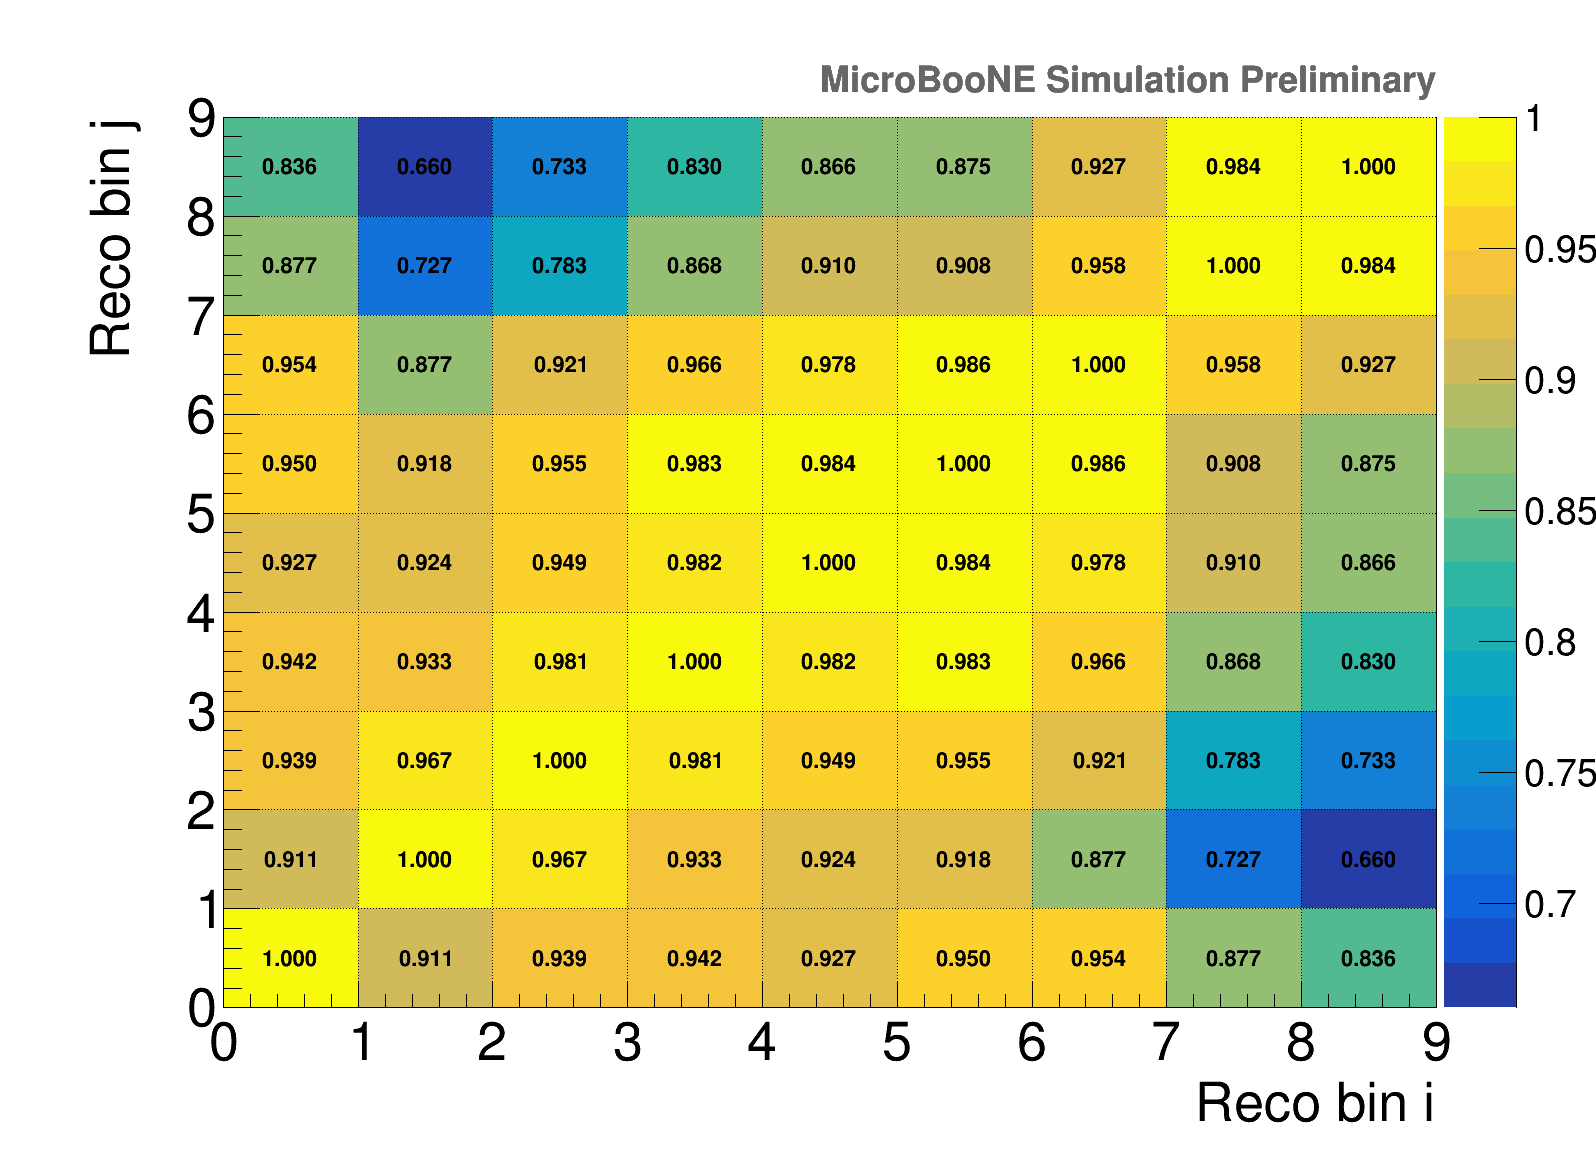

In [28]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")
#h_correlation.SetMinimum(-1)
h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_detsys_theta.png")
c1.SaveAs(outputdir_root + "h_correlation_detsys_theta.root")
c1.SaveAs(outputdir_pdf + "h_correlation_detsys_theta.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//png/h_covariance_detsys_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//root/h_covariance_detsys_theta.root has been created


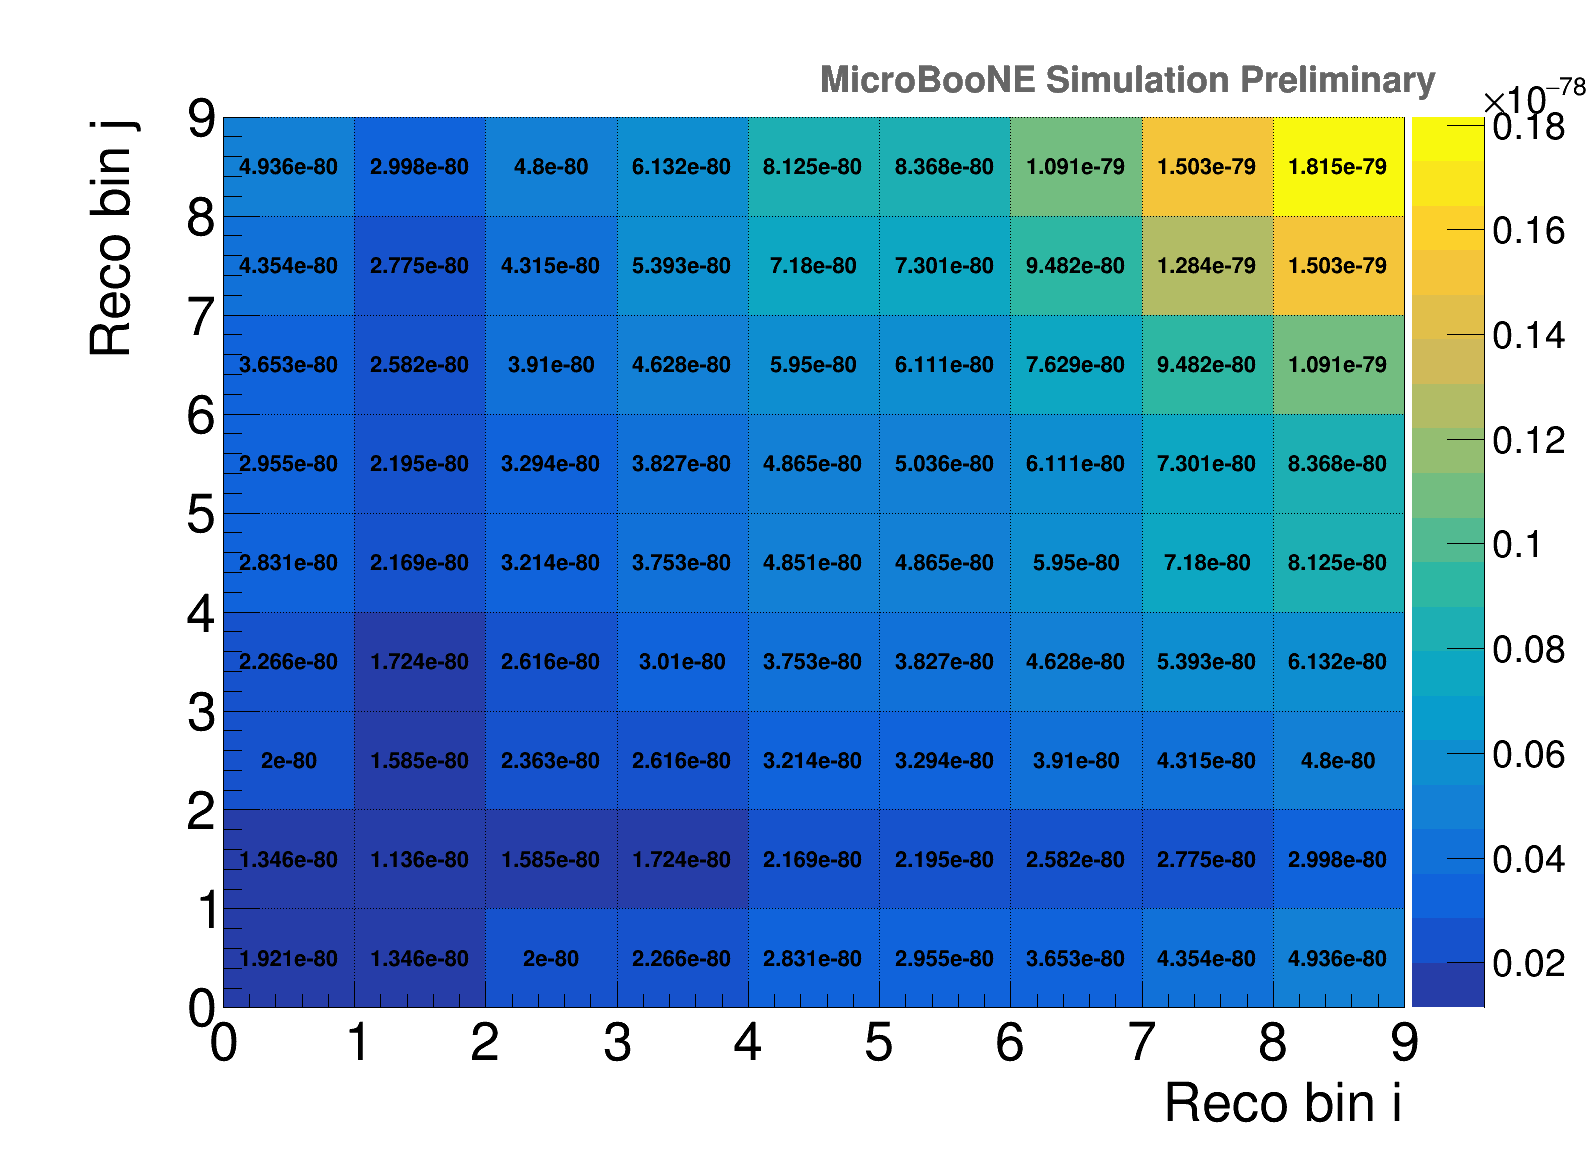

In [29]:
ROOT.gStyle.SetPaintTextFormat('0.4g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j]*1e-76)
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')
h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_detsys_theta.png")
c1.SaveAs(outputdir_root + "h_covariance_detsys_theta.root")
c1.SaveAs(outputdir_pdf + "h_covariance_detsys_theta.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//png/h_frac_covariance_detsys_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//root/h_frac_covariance_detsys_theta.root has been created


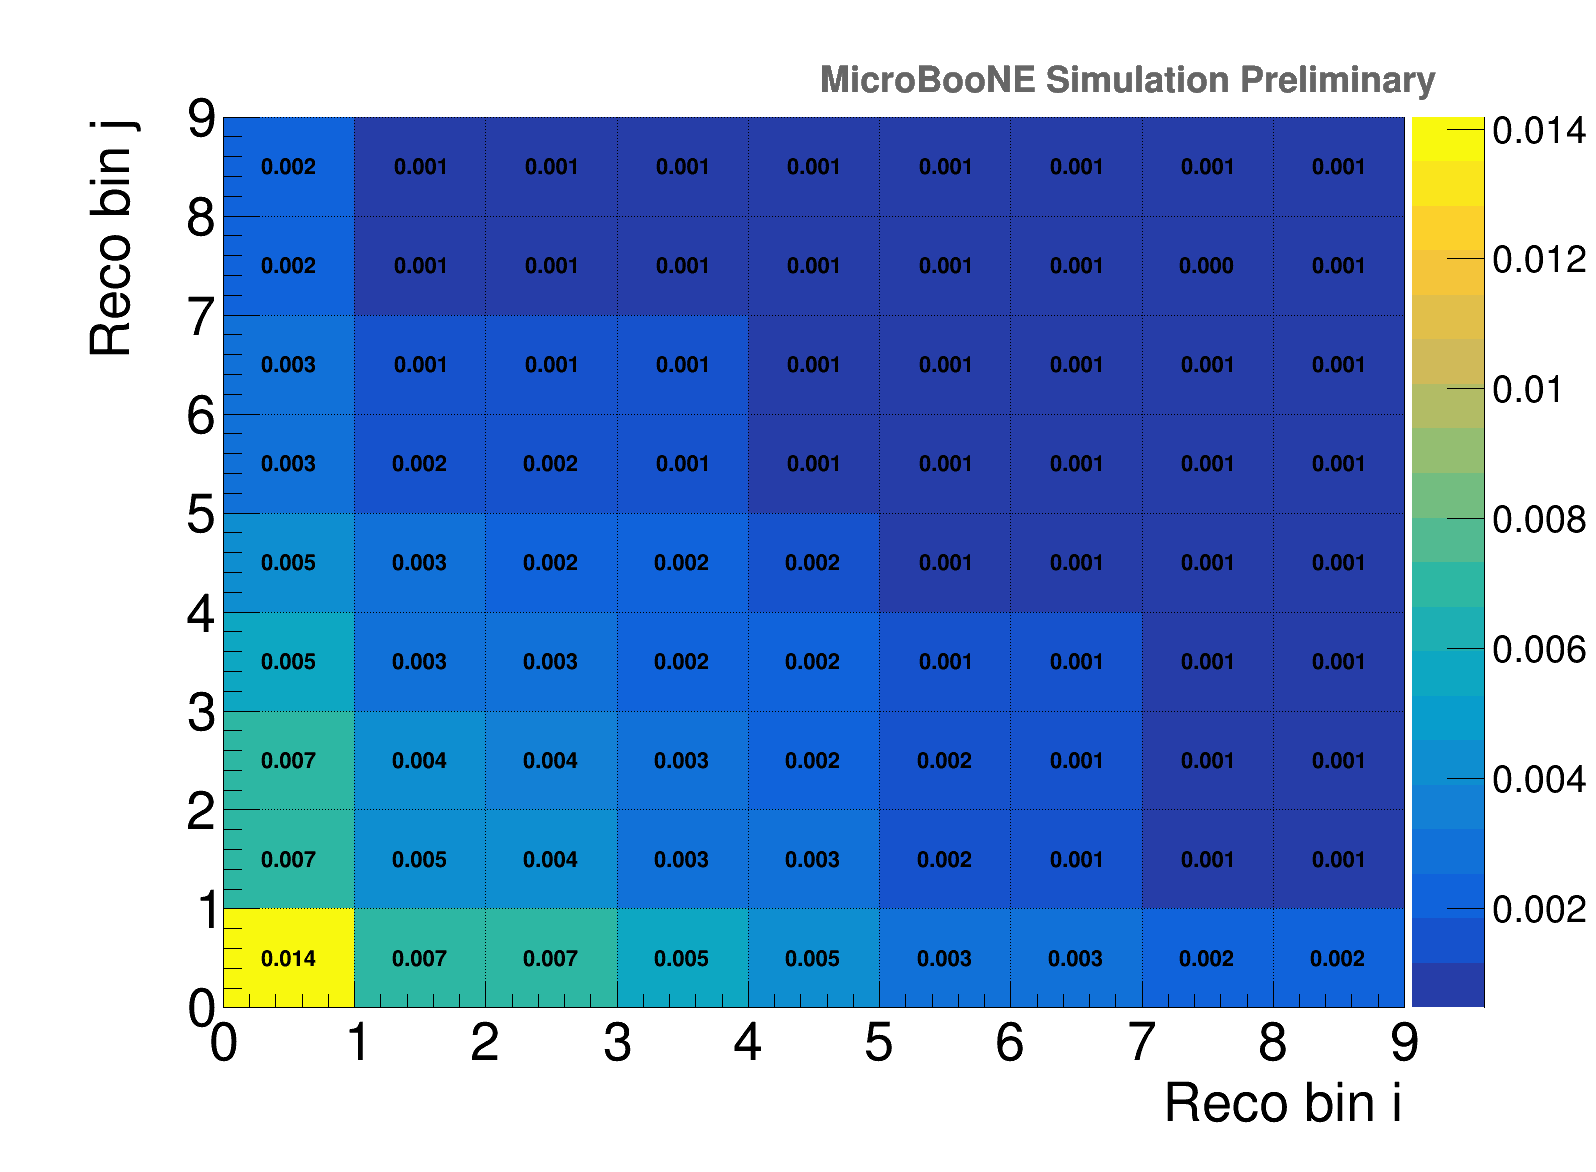

In [30]:
ROOT.gStyle.SetPaintTextFormat('0.4f')
h_frac_covariance = ROOT.TH2F("h_frac_covariance",'fractional covariance matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_frac_covariance.SetBinContent(i+1,j+1,xsec_frac_cov_matrix[i,j])
h_frac_covariance.SetXTitle("Reco bin i")
h_frac_covariance.SetYTitle("Reco bin j")
h_frac_covariance.GetYaxis().SetTitleSize(0.05)
h_frac_covariance.GetYaxis().SetTitleOffset(0.0)
h_frac_covariance.GetYaxis().SetLabelSize(0.05)
h_frac_covariance.GetXaxis().SetTitleSize(0.05)
h_frac_covariance.GetXaxis().SetLabelSize(0.05)
h_frac_covariance.GetXaxis().SetTitleOffset(1)
h_frac_covariance.SetLineColor(ROOT.kBlack)
h_frac_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_frac_covariance.Draw('colz')
c1.SetLogz(0)
h_frac_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_detsys_theta.png")
c1.SaveAs(outputdir_root + "h_frac_covariance_detsys_theta.root")
c1.SaveAs(outputdir_pdf + "h_frac_covariance_detsys_theta.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//png/h_xsec_all_genie_theta_stat_error.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//root/h_xsec_all_genie_theta_stat_error.root has been created


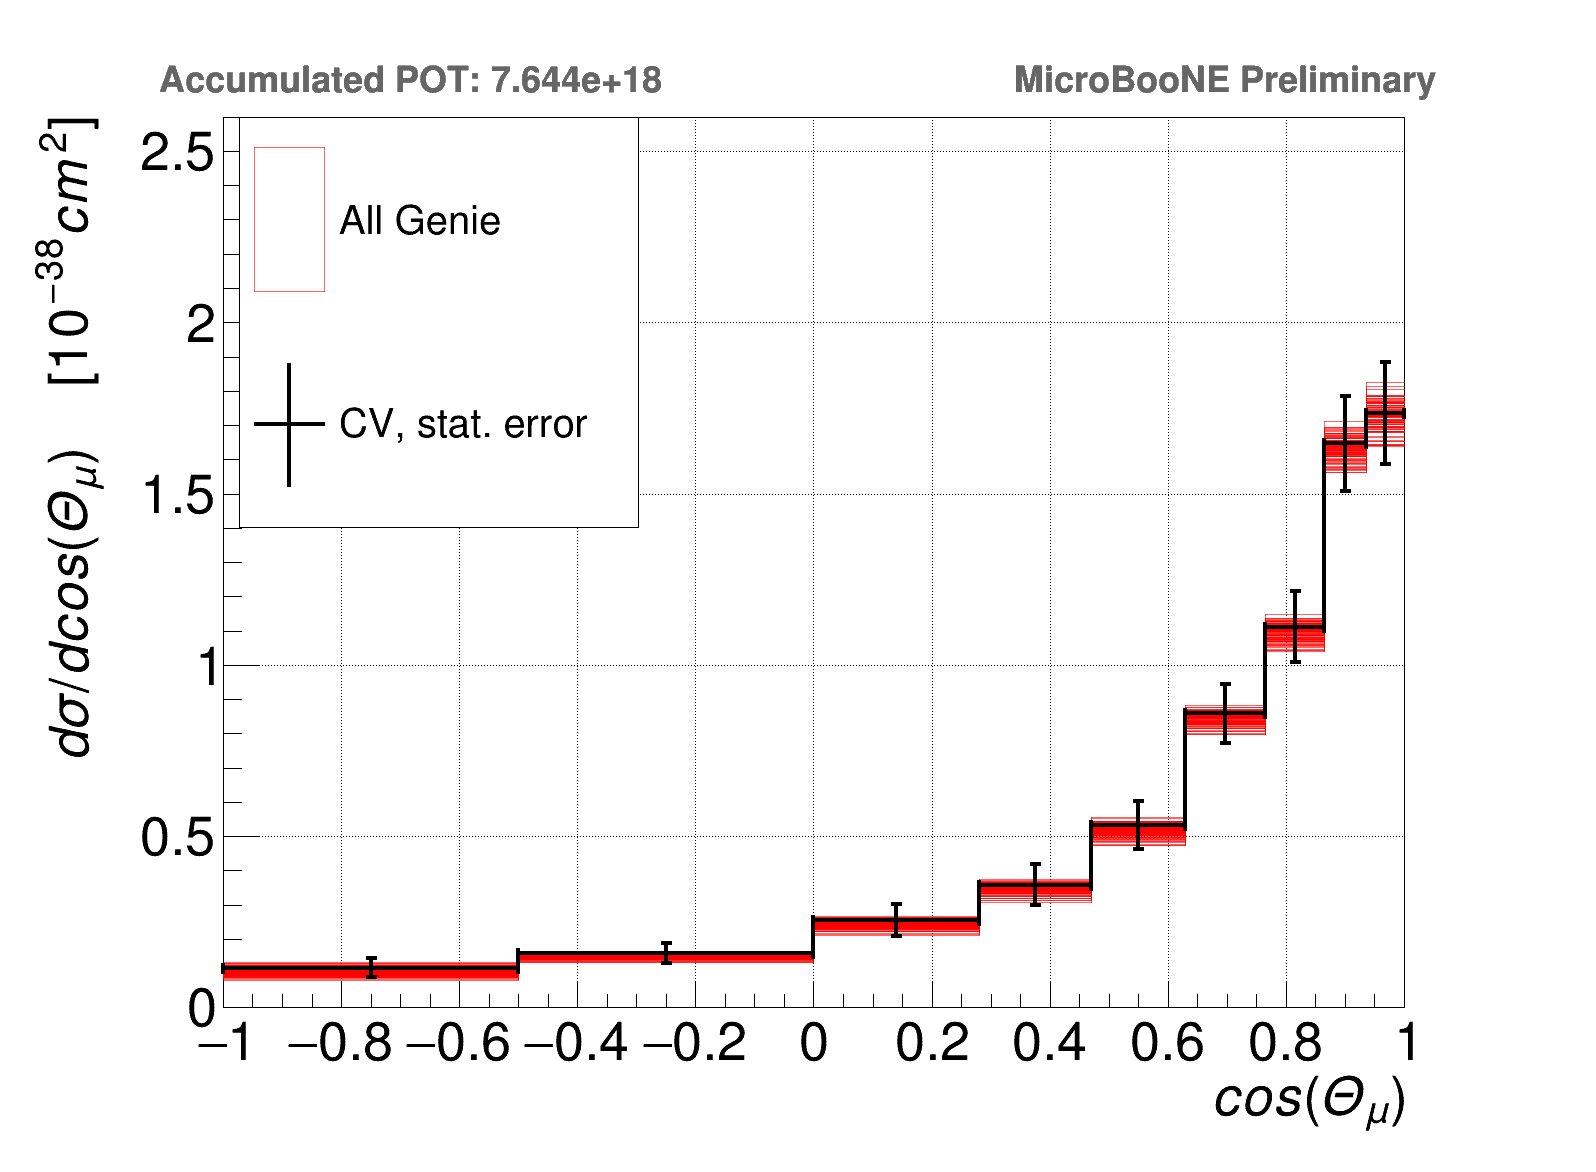

In [31]:
#with stat error
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.4,0.9); #LEGEND LEFT
h_xsec_cv.SetMaximum(2.6)
h_xsec_cv.Draw('hist')
for uni in range(num_universes): 
    h_xsec[uni].SetMaximum(2.6)
    h_xsec[uni].SetLineColorAlpha(ROOT.kRed,0.6)
    h_xsec[uni].SetYTitle("d\sigma / d cos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
    h_xsec[uni].SetXTitle("cos(\Theta_{\mu})")
    
    h_xsec[uni].GetYaxis().SetTitleSize(0.05)
    h_xsec[uni].GetYaxis().SetTitleOffset(0.0)
    h_xsec[uni].GetYaxis().SetLabelSize(0.05)
    h_xsec[uni].GetXaxis().SetTitleSize(0.05)
    h_xsec[uni].GetXaxis().SetLabelSize(0.05)
    h_xsec[uni].GetXaxis().SetTitleOffset(1)
    #h_covariance.SetLineColor(ROOT.kBlack)
    h_eff_true[uni].SetLineWidth(1)
    ROOT.gStyle.SetEndErrorSize(5)
    h_xsec[uni].Draw('hist same')
legend.AddEntry(h_xsec[0],'All Genie',"f")
legend.AddEntry(h_xsec_cv,'CV, stat. error',"lep")
legend.Draw()
h_xsec_cv.SetLineColor(ROOT.kBlack)
h_xsec_cv.Draw('hist E1 same')  
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
h_stat = h_xsec_cv.Clone()

c1.SaveAs(outputdir_png + "h_xsec_all_genie_theta_stat_error.png")
c1.SaveAs(outputdir_root + "h_xsec_all_genie_theta_stat_error.root")
c1.SaveAs(outputdir_pdf + "h_xsec_all_genie_theta_stat_error.pdf")

In [32]:
for i in range(num_bins):
    print math.sqrt(xsec_cov_matrix[i][i])

0.0138596085454
0.0106577300555
0.015372475018
0.0173481796105
0.02202472465
0.0224421253638
0.0276213431257
0.0358272587753
0.042608499269


0.0138596085454
0.0106577300555
0.015372475018
0.0173481796105
0.02202472465
0.0224421253638
0.0276213431257
0.0358272587753
0.042608499269


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//png/h_xsec_all_genie_theta_sys_error.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//root/h_xsec_all_genie_theta_sys_error.root has been created


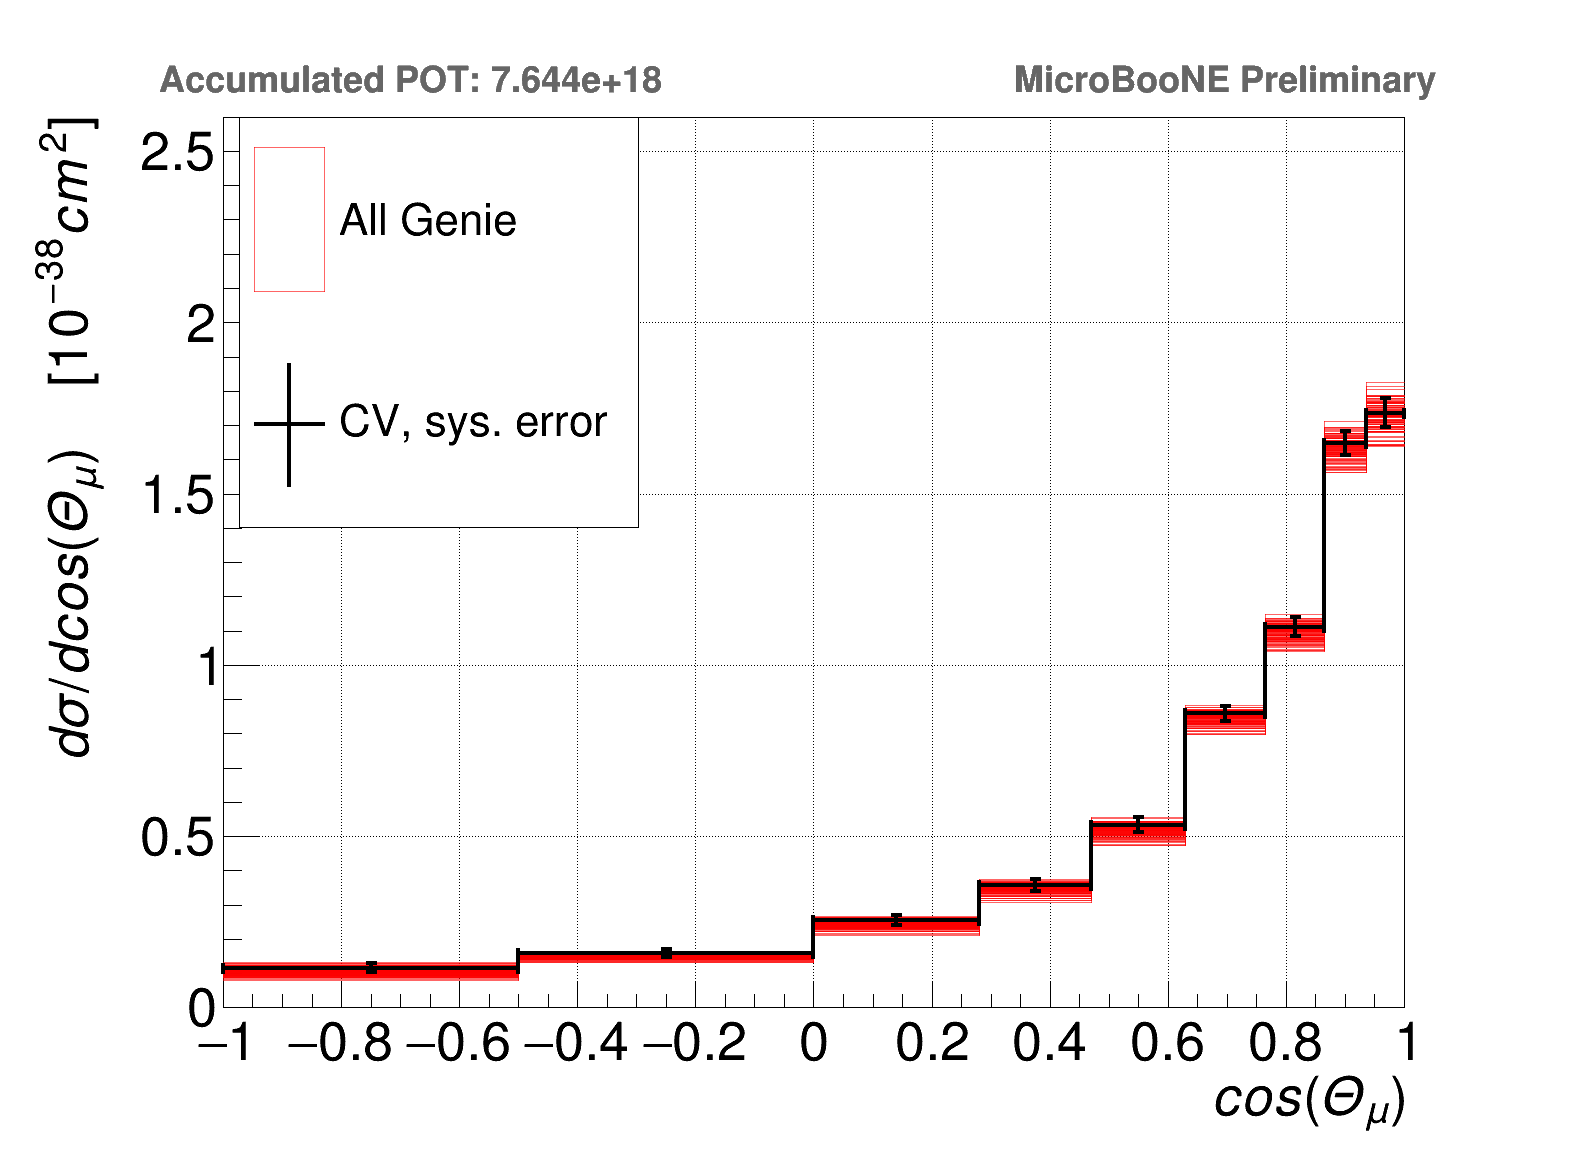

In [33]:
#with sys error
legend = ROOT.TLegend(0.15,0.55,0.4,0.9); #LEGEND LEFT
h_xsec_cv.Draw('hist')
for uni in range(num_universes): 
    h_xsec[uni].SetMaximum(2.6)
    h_xsec[uni].SetLineColorAlpha(ROOT.kRed,0.6)
    h_xsec[uni].SetYTitle("d\sigma / d cos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
    h_xsec[uni].SetXTitle("cos(\Theta_{\mu})")
    h_xsec[uni].GetYaxis().SetTitleSize(0.05)
    h_xsec[uni].GetYaxis().SetTitleOffset(0.0)
    h_xsec[uni].GetYaxis().SetLabelSize(0.05)
    h_xsec[uni].GetXaxis().SetTitleSize(0.05)
    h_xsec[uni].GetXaxis().SetLabelSize(0.05)
    h_xsec[uni].GetXaxis().SetTitleOffset(1)
    #h_covariance.SetLineColor(ROOT.kBlack)
    h_xsec[uni].SetLineWidth(1)
    ROOT.gStyle.SetEndErrorSize(5)
    h_xsec[uni].Draw('hist same')
for i in range(num_bins):
    h_xsec_cv.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i][i]))
    print math.sqrt(xsec_cov_matrix[i][i])
legend.AddEntry(h_xsec[0],'All Genie',"f")
legend.AddEntry(h_xsec_cv,'CV, sys. error',"lep")
legend.Draw()
h_xsec_cv.SetLineColor(ROOT.kBlack)
h_xsec_cv.Draw('hist E1 same')   
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_all_genie_theta_sys_error.png")
c1.SaveAs(outputdir_root + "h_xsec_all_genie_theta_sys_error.root")
c1.SaveAs(outputdir_pdf + "h_xsec_all_genie_theta_sys_error.pdf")

0 0.00019208874903159812 0.000702546178756
0 0.0138596085454 0.0265055876893
1 0.00011358720993534188 0.000804922605816
1 0.0106577300555 0.0283711579922
2 0.00023631298817821555 0.00221321575887
2 0.015372475018 0.0470448271213
3 0.0003009593357972484 0.00357334034497
3 0.0173481796105 0.0597774233718
4 0.0004850884959073198 0.00487349756758
4 0.02202472465 0.0698104402477
5 0.0005036489908427555 0.00729508742866
5 0.0224421253638 0.0854112839657
6 0.0007629385960652257 0.0107050396509
6 0.0276213431257 0.103465161532
7 0.001283592471355064 0.0192807309243
7 0.0358272587753 0.138855071655
8 0.0018154842099531265 0.0220090759793
8 0.042608499269 0.148354561707


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//png/h_xsec_all_genie_theta_tot_error.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_all_combine_theta//root/h_xsec_all_genie_theta_tot_error.root has been created


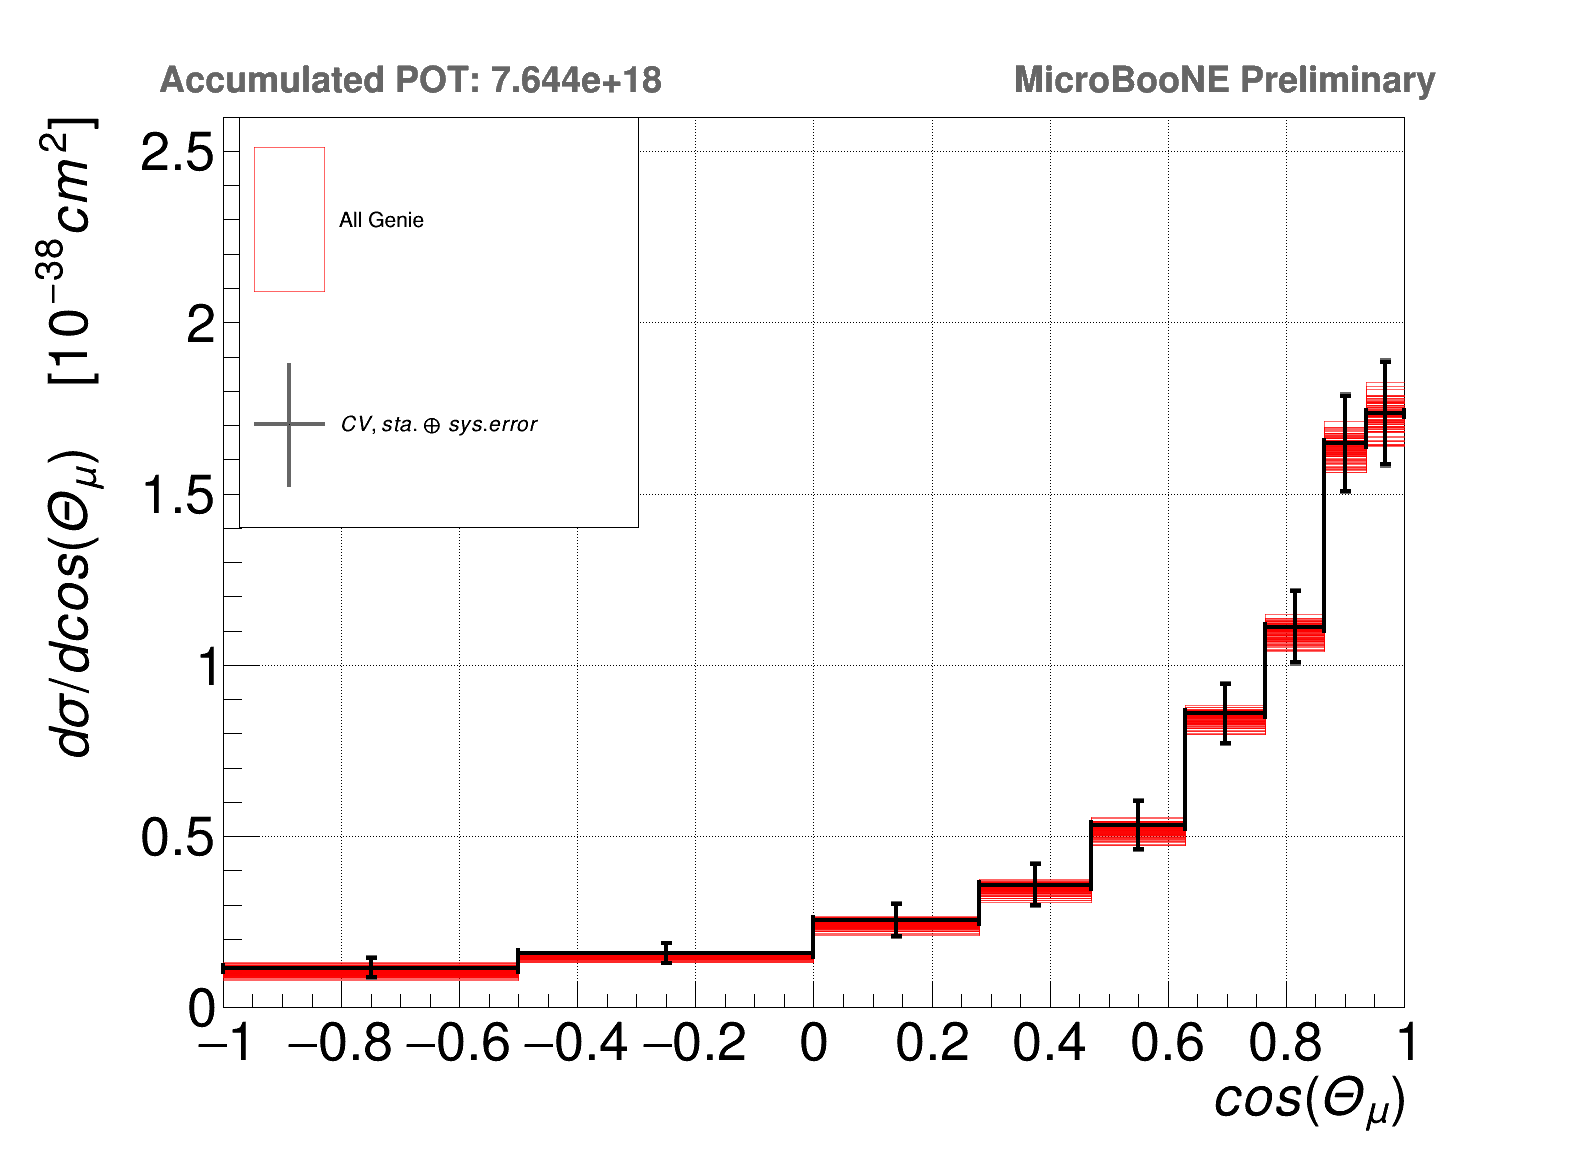

In [34]:
#with sys error
#legend = ROOT.TLegend(0.45,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.4,0.9); #LEGEND LEFT
h_xsec_cv.Draw('hist')
for uni in range(num_universes): 
    h_xsec[uni].SetMaximum(2.6)
    h_xsec[uni].SetLineColorAlpha(ROOT.kRed,0.6)
    h_xsec[uni].SetYTitle("d\sigma / d cos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
    h_xsec[uni].SetXTitle("cos(\Theta_{\mu})")
    h_xsec[uni].GetYaxis().SetTitleSize(0.05)
    h_xsec[uni].GetYaxis().SetTitleOffset(0.0)
    h_xsec[uni].GetYaxis().SetLabelSize(0.05)
    h_xsec[uni].GetXaxis().SetTitleSize(0.05)
    h_xsec[uni].GetXaxis().SetLabelSize(0.05)
    h_xsec[uni].GetXaxis().SetTitleOffset(1)
    #h_covariance.SetLineColor(ROOT.kBlack)
    h_eff_true[uni].SetLineWidth(1)
    ROOT.gStyle.SetEndErrorSize(5)
    h_xsec[uni].Draw('hist same')
for i in range(num_bins):
    h_xsec_cv.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i][i]+math.pow(h_stat.GetBinError(i+1),2)))
    print i,xsec_cov_matrix[i][i],math.pow(h_stat.GetBinError(i+1),2)
    print i,math.sqrt(xsec_cov_matrix[i][i]),h_stat.GetBinError(i+1)
h_xsec_cv.SetLineColor(ROOT.kGray+2)
legend.AddEntry(h_xsec[0],'All Genie                 ',"f")
legend.AddEntry(h_xsec_cv,'CV, sta. \oplus sys. error',"lep")
#legend.AddEntry(h_stat,'CV, stat. error',"lep")
legend.Draw()
h_xsec_cv.Draw('hist E1 same') 
h_stat.SetLineColor(ROOT.kBlack)
h_stat.Draw('hist E1 same')
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_all_genie_theta_tot_error.png")
c1.SaveAs(outputdir_root + "h_xsec_all_genie_theta_tot_error.root")
c1.SaveAs(outputdir_pdf + "h_xsec_all_genie_theta_tot_error.pdf")

In [35]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
num_universes = 100
eff_uni = np.zeros((num_universes))
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1

In [36]:
# close the root file with all the histos
#RootFile.Close()